<a href="https://colab.research.google.com/github/screid/Estadistica_Computacional_UGM/blob/main/Clase_11_Muestreo_y_simulacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine
import numpy as np

In [18]:
# Cargo el dataset
wine = load_wine()

In [19]:
# Veo la información del dataset pre-cargado
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [20]:
# Separo X (var independientes) e Y (var dependiente)
X = wine.data
y = wine.target

# 1. Muestreo estratificado

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(
    n_splits=1,
    test_size=0.2,
    random_state=42
)

for train_idx, test_idx in split.split(X, y):
    X_train = X[train_idx]
    y_train = y[train_idx]

In [22]:
# Mostrar resultados
# Función auxiliar: devuelve DataFrame con conteo y porcentaje
def summary(arr, label):
    uniq, cnt = np.unique(arr, return_counts=True)
    tot = cnt.sum()
    return pd.DataFrame({
        'Clase': uniq,
        f'{label} (#)': cnt,
        f'{label} (%)': np.round(cnt / tot * 100, 1)
    })

# Construir la tabla final
summary_df = (
    summary(y,           'Total')
    .merge(summary(y[train_idx], 'Train'), on='Clase')
    .merge(summary(y[test_idx],  'Test'),  on='Clase')
)

# Mostrar resultado
print(summary_df)

   Clase  Total (#)  Total (%)  Train (#)  Train (%)  Test (#)  Test (%)
0      0         59       33.1         47       33.1        12      33.3
1      1         71       39.9         57       40.1        14      38.9
2      2         48       27.0         38       26.8        10      27.8


Así queda claro que el muestreo estratificado solo re-ordena y particiona la población original sin alterar ni duplicar observaciones. Para verlo más explicito, podemos mostrar solo los tamaños del train y test. En él nos daremos cuenta que da, justo, 80% y 20%.

In [25]:
print(f'Tamaño total : {len(X)}')
print(f'Tamaño Train   : {len(train_idx)}')
print(f'Tamaño Test    : {len(test_idx)}')
print(f'Porcentaje Train: {len(train_idx)/len(X):.2f}')
print(f'Porcentaje Test : {len(test_idx)/len(X):.2f}')

Tamaño total : 178
Tamaño Train   : 142
Tamaño Test    : 36
Porcentaje Train: 0.80
Porcentaje Test : 0.20


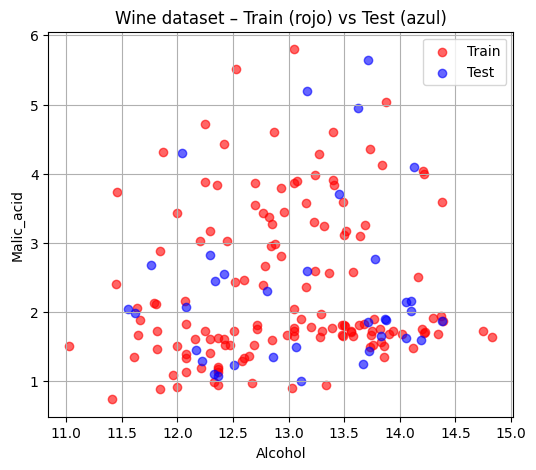

In [27]:
# Elegimos 2 variables para el gráfico, en este caso Alcohol (col 0) vs. Malic acid (col 1)
x_feat, y_feat = 0, 1   # cambia si prefieres otras columnas

# Dibujamos el gráfico
plt.figure(figsize=(6, 5))
plt.scatter(X[train_idx, x_feat], X[train_idx, y_feat],
            c='red',  alpha=0.6, label='Train')
plt.scatter(X[test_idx,  x_feat], X[test_idx,  y_feat],
            c='blue', alpha=0.6, label='Test')
plt.xlabel(wine.feature_names[x_feat].capitalize())
plt.ylabel(wine.feature_names[y_feat].capitalize())
plt.title('Wine dataset – Train (rojo) vs Test (azul)')
plt.legend()
plt.grid(True)
plt.show()

# 2. Muestreo Sistemático

In [36]:
# 1. Cargar datos como DataFrame
wine = load_wine(as_frame=True)
df   = wine.frame                     # 178 filas, 14 variables + target

In [37]:
# 2. Parámetros del muestreo sistemático
n = 40                                # tamaño deseado de la muestra
N = len(df)                           # tamaño de la población
k = N // n                            # intervalo
start = np.random.randint(0, k)       # arranque aleatorio en [0, k-1]

In [38]:
# 3. Índices de la muestra: start, start+k, start+2k, …
indices = np.arange(start, N, k)[:n]  # asegura n elementos
sist_sample = df.iloc[indices]

print(f'Muestra sistemática de {n} registros (k = {k}, start = {start})')
print(sist_sample.head())

Muestra sistemática de 40 registros (k = 4, start = 0)
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0     14.23        1.71  2.43               15.6      127.0            2.8   
4     13.24        2.59  2.87               21.0      118.0            2.8   
8     14.83        1.64  2.17               14.0       97.0            2.8   
12    13.75        1.73  2.41               16.0       89.0            2.6   
16    14.30        1.92  2.72               20.0      120.0            2.8   

    flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0         3.06                  0.28             2.29             5.64  1.04   
4         2.69                  0.39             1.82             4.32  1.04   
8         2.98                  0.29             1.98             5.20  1.08   
12        2.76                  0.29             1.81             5.60  1.15   
16        3.14                  0.33             1.97             6.20  1.07

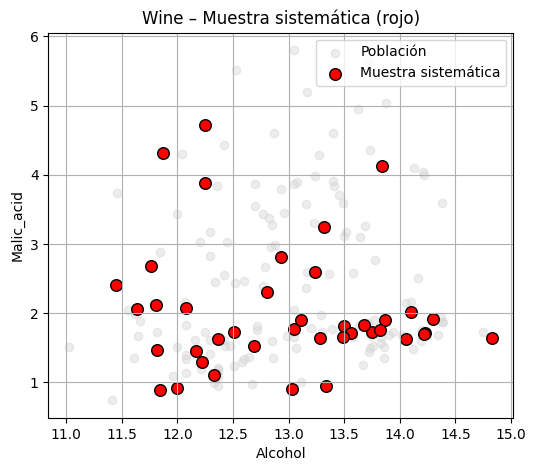

In [40]:
x_feat, y_feat = 0, 1                # 0 = alcohol, 1 = malic_acid (cambia si quieres)
x_col,  y_col  = df.columns[x_feat], df.columns[y_feat]

plt.figure(figsize=(6, 5))

# Población completa (gris claro)
plt.scatter(df[x_col], df[y_col],
            c='lightgray', alpha=0.4, label='Población')

# Muestra sistemática (rojo)
plt.scatter(sist_sample[x_col], sist_sample[y_col],
            c='red', edgecolors='k', s=70, label='Muestra sistemática')

plt.xlabel(x_col.capitalize())
plt.ylabel(y_col.capitalize())
plt.title('Wine – Muestra sistemática (rojo)')
plt.legend()
plt.grid(True)
plt.show()

# 3. Simulación de Montecarlo

Es un método numérico que reemplaza un problema analítico difícil por la repetición masiva de experimentos aleatorios generados por computador.

1. Modela el fenómeno con variables aleatorias apropiadas.

2. Muestra (genera) esas variables miles de veces.

3. Resume los resultados (promedios, probabilidades, quantiles).

Por la ley de los grandes números, el promedio de las réplicas converge al valor teórico; así obtenemos estimaciones con un error que disminuye como $1/ \sqrt{N}$

Para este ejemplo, vamos a hacernos la siguiente pregunta:

¿Qué tan variable es la media de Alcohol si sólo pudiéramos catar 40 vinos?

Para esto haremos los siguientes pasos:
1. Toma una muestra aleatoria simple sin reemplazo de 40 registros.

2. Calcula la media de alcohol.

3. Repite 1-2 10 000 veces.

4. Observa la distribución de las 10 000 medias y compara con la media poblacional real.

In [43]:
# Dataset y población
wine  = load_wine()
alcohol = wine.data[:, 0]            # columna 0 = 'alcohol'
pop_mean = alcohol.mean()            # media real (población)
N, n = len(alcohol), 40              # 178 vinos, muestra de 40

In [47]:
# Aplicar simulación de Montecarlo (repetir 10,000 veces)
B = 10_000                           # número de réplicas
means = np.empty(B)

rng = np.random.default_rng(seed=42) # generador reproducible
for b in range(B):
    sample = rng.choice(alcohol, size=n, replace=False)
    means[b] = sample.mean()

In [46]:
# Ver resultados numéricos
mc_mean  = means.mean()
mc_std   = means.std(ddof=1)
ci_low, ci_high = np.percentile(means, [2.5, 97.5])

print(f'Población  μ = {pop_mean:.3f}')
print(f'MonteCarlo μ = {mc_mean:.3f}  (sd = {mc_std:.3f})')
print(f'IC 95 % ≈ [{ci_low:.3f}, {ci_high:.3f}]')


Población  μ = 13.001
MonteCarlo μ = 12.999  (sd = 0.114)
IC 95 % ≈ [12.771, 13.224]


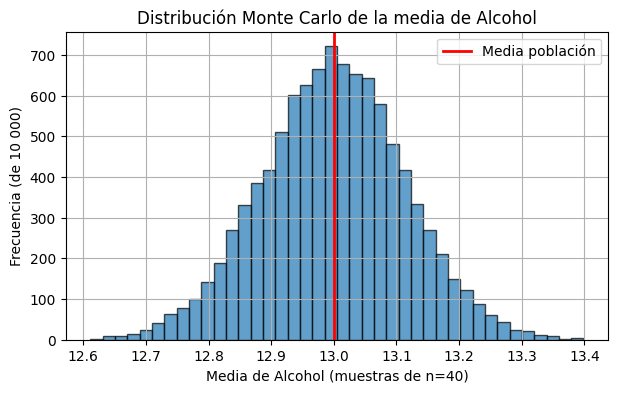

In [49]:
# Mostrar histograma
plt.figure(figsize=(7,4))
plt.hist(means, bins=40, alpha=0.7, edgecolor='k')
plt.axvline(pop_mean, color='red', lw=2, label='Media población')
plt.xlabel('Media de Alcohol (muestras de n=40)')
plt.ylabel('Frecuencia (de 10 000)')
plt.title('Distribución Monte Carlo de la media de Alcohol')
plt.legend()
plt.grid(True)
plt.show()

Con este histograma podemos observar:

1. El histograma de 10 000 medias se aproxima a una curva normal centrada en la media poblacional.

2. La desviación estándar coincide con la fórmula $\sqrt{\sigma /n ( 1 - n/N ) }$

3. El intervalo 95 % de Monte Carlo ilustra la incertidumbre por muestrear sólo 40 de los 178 vinos.